In [1]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")

#### Setup Ripser

In [2]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

#### Synthetic Data: Points on a circle

In [3]:
X <- circleUnif(n = 15)

#### Compute Vietoris-Rips and Alpha complexes

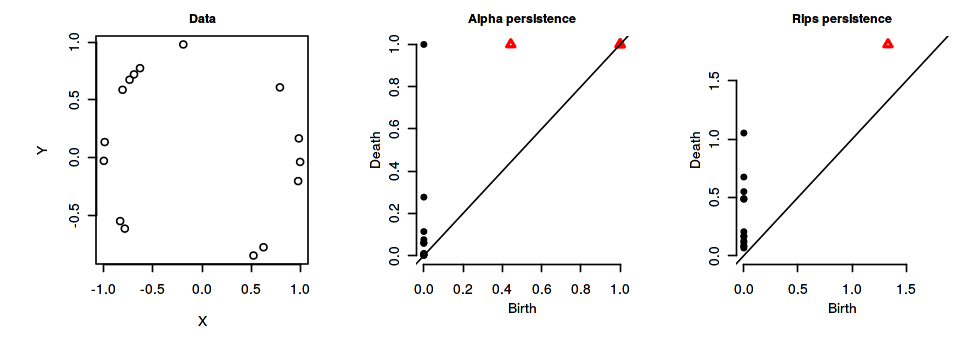

In [4]:
DiagAlphaCmplx = alphaComplexDiag(X, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(X, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(X, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

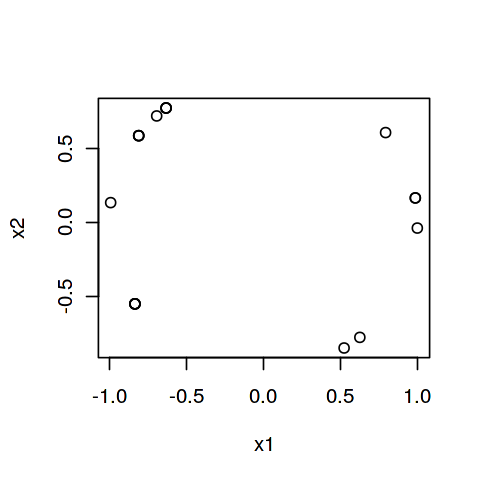

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [6]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 18

In [7]:
str(DiagAlphaCmplx$cycleLocation)

List of 18
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.809 -0.834 0.588 -0.552
 $ : num [1:2, 1, 1:2] -0.991 -0.809 0.134 0.588
 $ : num [1:2, 1, 1:2] -0.631 -0.809 0.776 0.588
 $ : num [1:2, 1, 1:2] 0.524 -0.631 -0.852 0.776
 $ : num [1:2, 1, 1:2] 0.626 0.524 -0.78 -0.852
 $ : num [1:2, 1, 1:2] 0.986 0.626 0.166 -0.78
 $ : num [1:2, 1, 1:2] 0.9993 0.9862 -0.0386 0.1657
 $ : num [1:2, 1, 1:2] -0.692 -0.631 0.722 0.776
 $ : num [1:2, 1, 1:2] 0.793 0.986 0.609 0.166
 $ : num [1:2, 1, 1:2] 0.9788 0.9993 -0.205 -0.0386
 $ : num [1:2, 1, 1:2] -0.9996 -0.991 -0.0292 0.1339
 $ : num [1:2, 1, 1:2] -0.786 -0.834 -0.618 -0.552
 $ : num [1:2, 1, 1:2] -0.738 -0.692 0.675 0.722
 $ : num [1:2, 1, 1:2] -0.19 -0.631 0.982 0.776
 $ : num [1:15, 1:2, 1:2] 0.524 0.793 0.626 -0.834 -0.809 ...
 $ : num [1:10, 1:2, 1:2] -0.692 0.793 -0.809 0.524 0.626 ...
 $ : num [1:8, 1:2, 1:2] -0.692 -0.692 0.793 0.524 0.626 ...


In [8]:
DiagAlphaCmplx

$diagram
      dimension     Birth       Death
 [1,]         0 0.0000000         Inf
 [2,]         0 0.0000000 0.075357759
 [3,]         0 0.0000000 0.059815192
 [4,]         0 0.0000000 0.003166445
 [5,]         0 0.0000000 0.276717866
 [6,]         0 0.0000000 0.003907208
 [7,]         0 0.0000000 0.113645060
 [8,]         0 0.0000000 0.010481579
 [9,]         0 0.0000000 0.001656477
[10,]         0 0.0000000 0.058381515
[11,]         0 0.0000000 0.007027223
[12,]         0 0.0000000 0.006662481
[13,]         0 0.0000000 0.001629408
[14,]         0 0.0000000 0.001059017
[15,]         0 0.0000000 0.059208620
[16,]         1 0.4428519 1.000000000
[17,]         1 1.0000000 1.000000000
[18,]         1 1.0000000 1.000000000

$birthLocation
              x1          x2
 [1,] -0.8335278 -0.55247752
 [2,] -0.8089577  0.58786687
 [3,] -0.9910001  0.13386101
 [4,] -0.6313217  0.77552104
 [5,]  0.5240003 -0.85171806
 [6,]  0.6261752 -0.77968241
 [7,]  0.9861690  0.16574281
 [8,]  0.9992548 -0.0

#### Plot merging events for connected components (dim 0 homology)

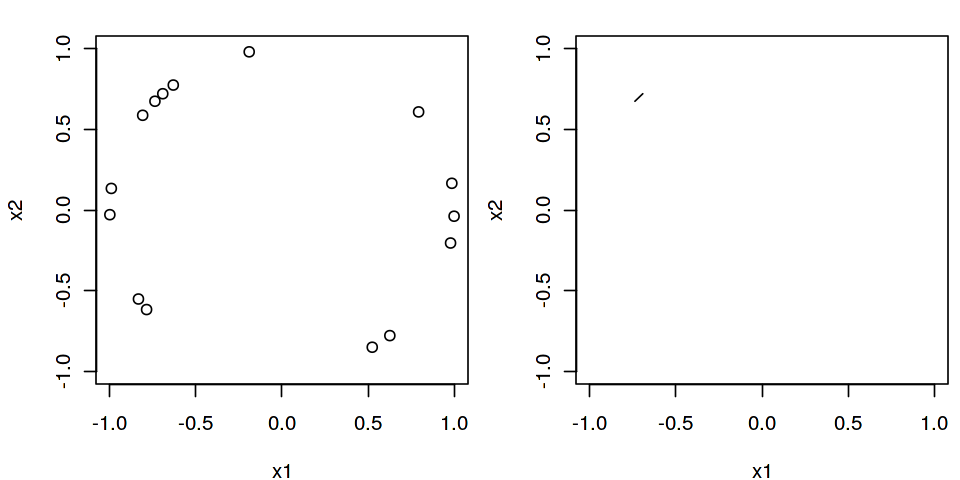

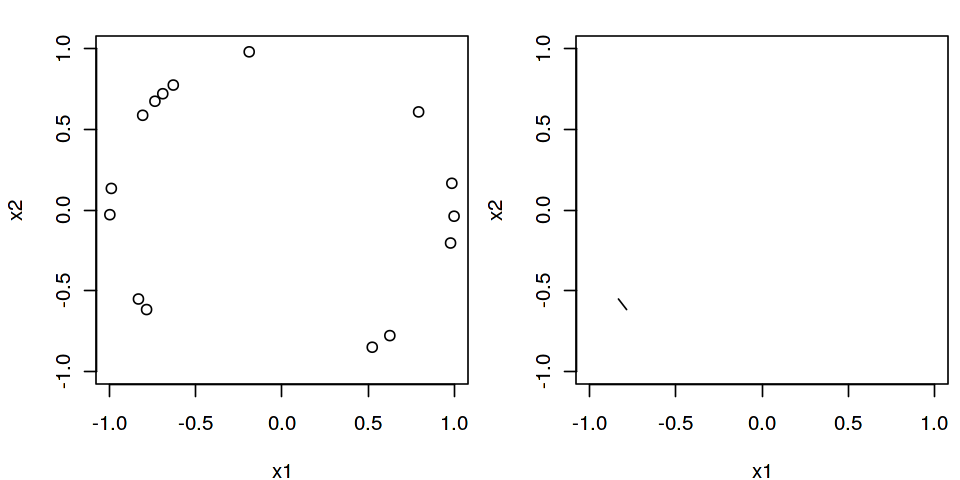

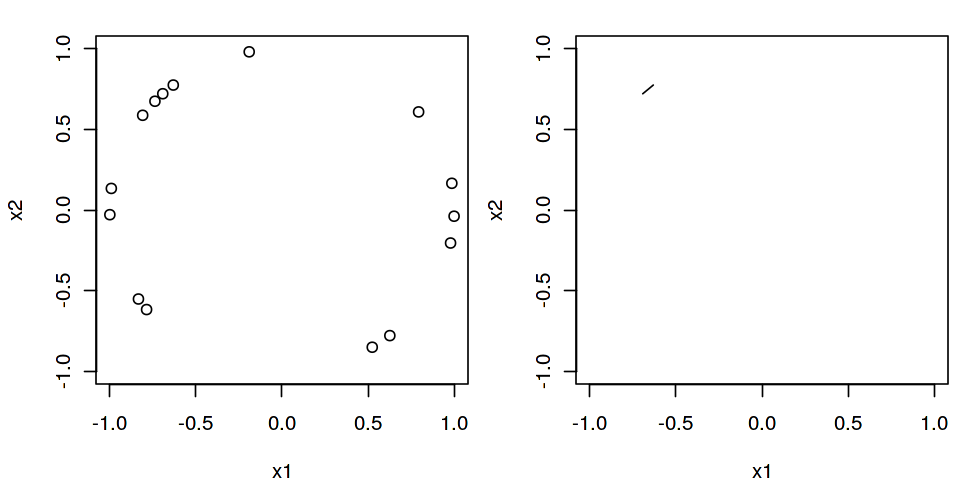

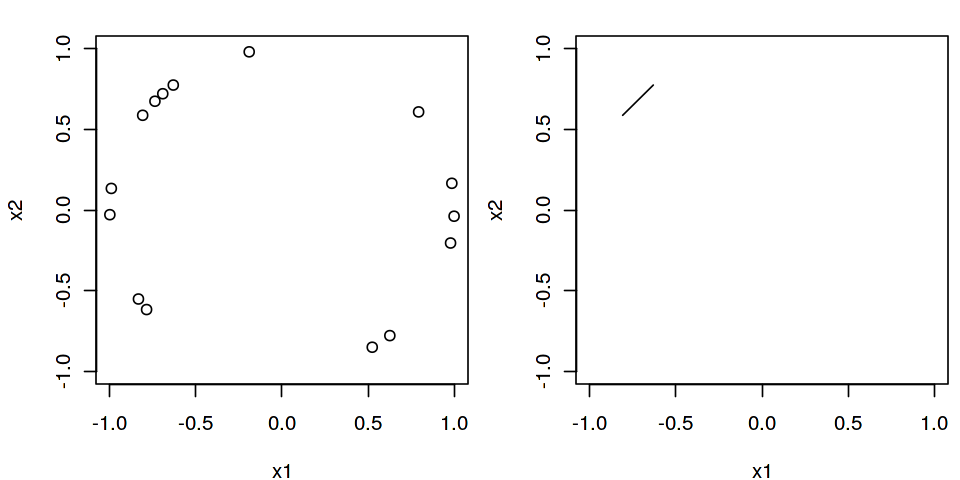

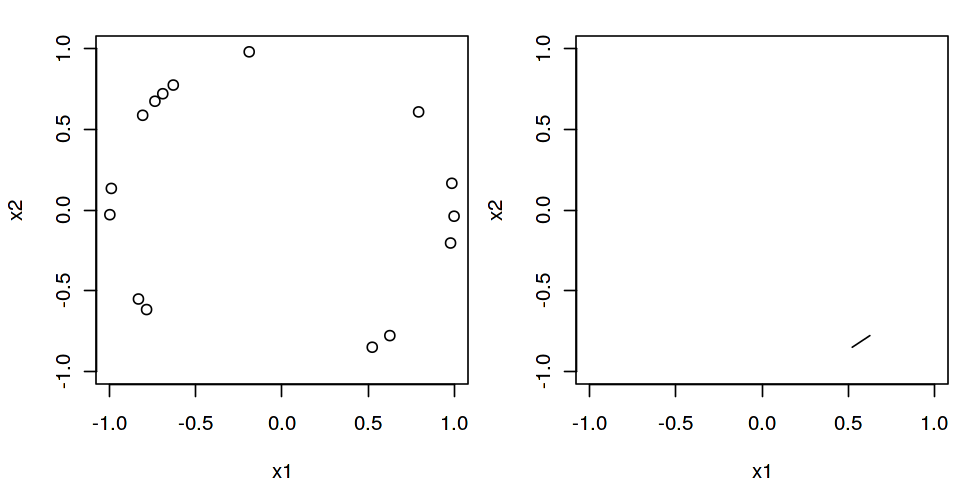

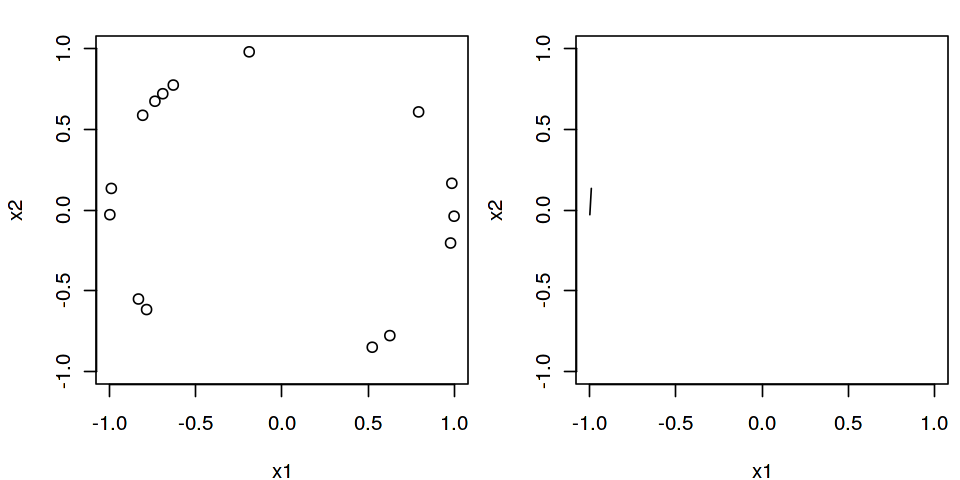

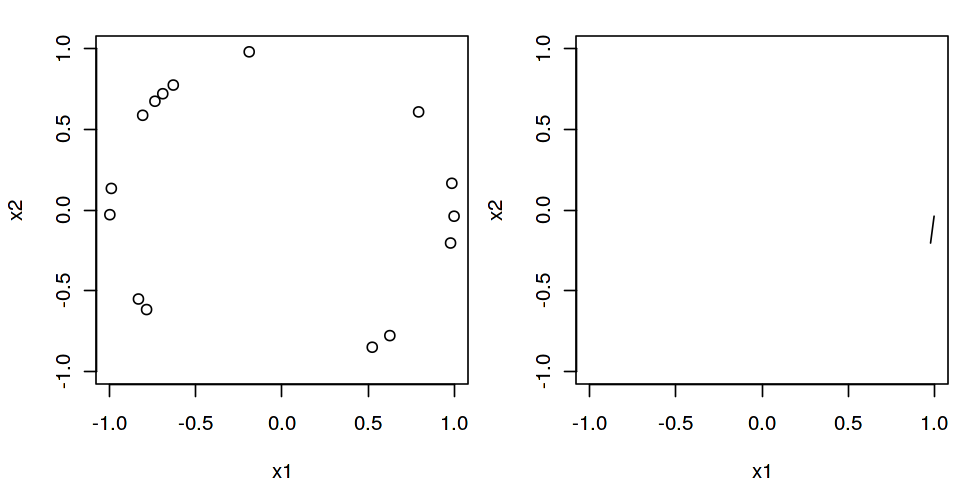

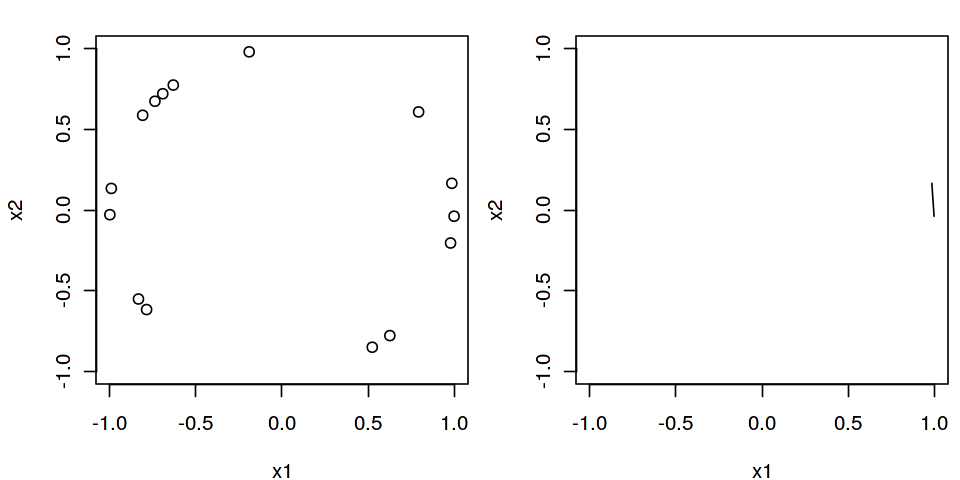

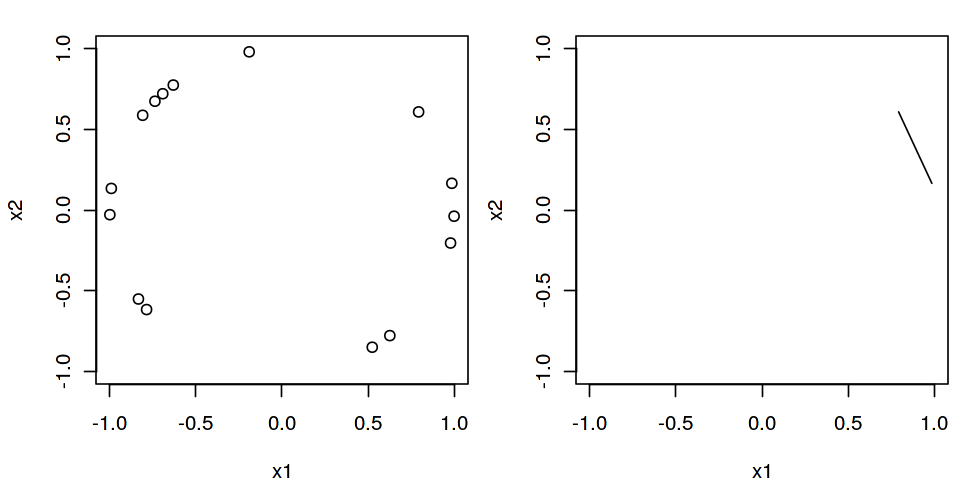

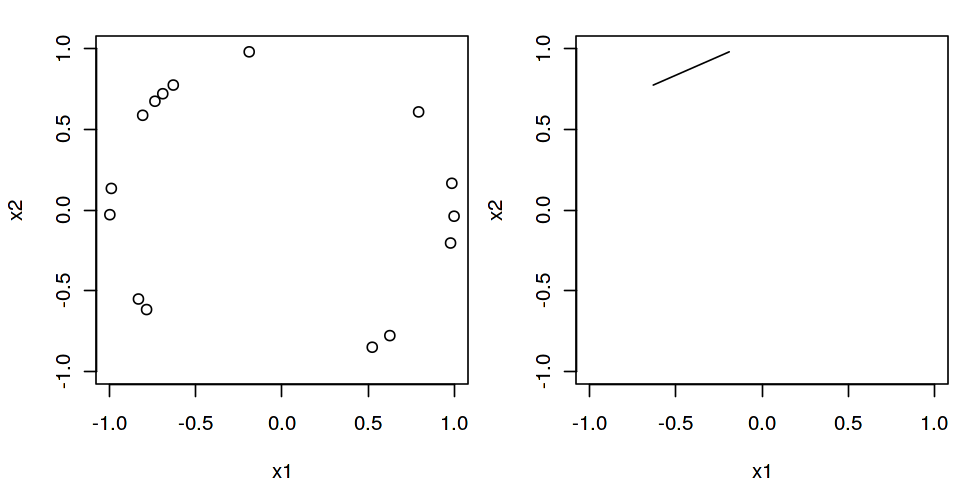

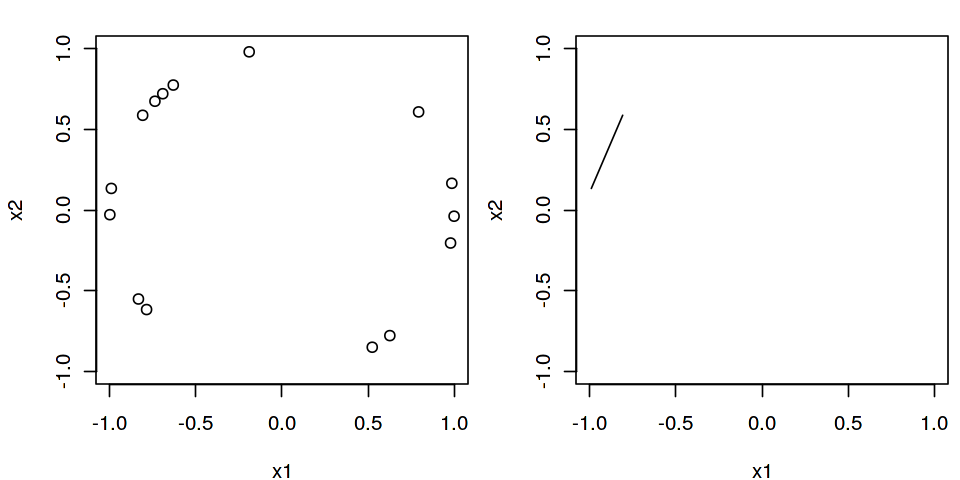

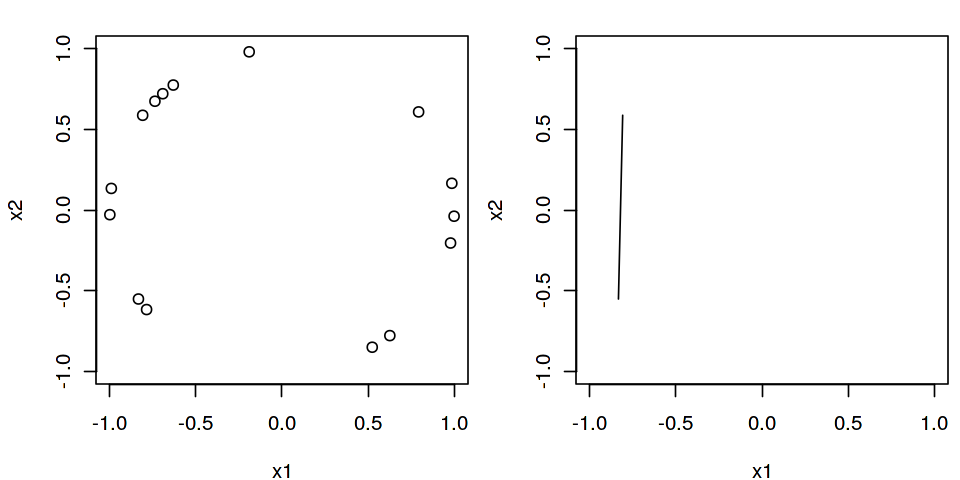

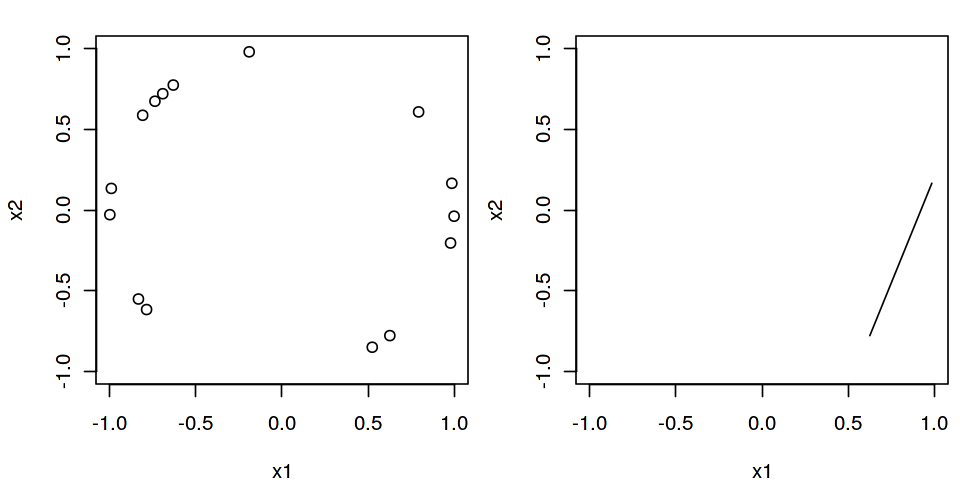

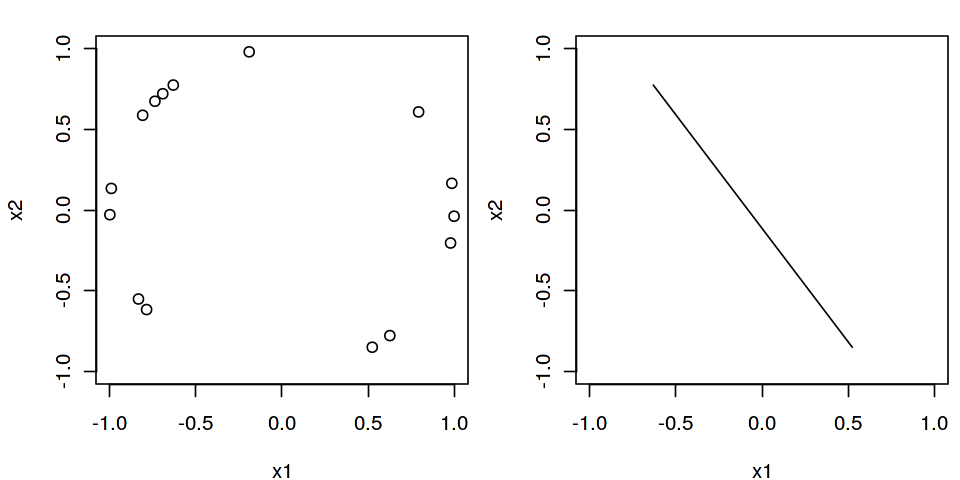

In [9]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 1){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Plot loop closing events (dim 1 homology)

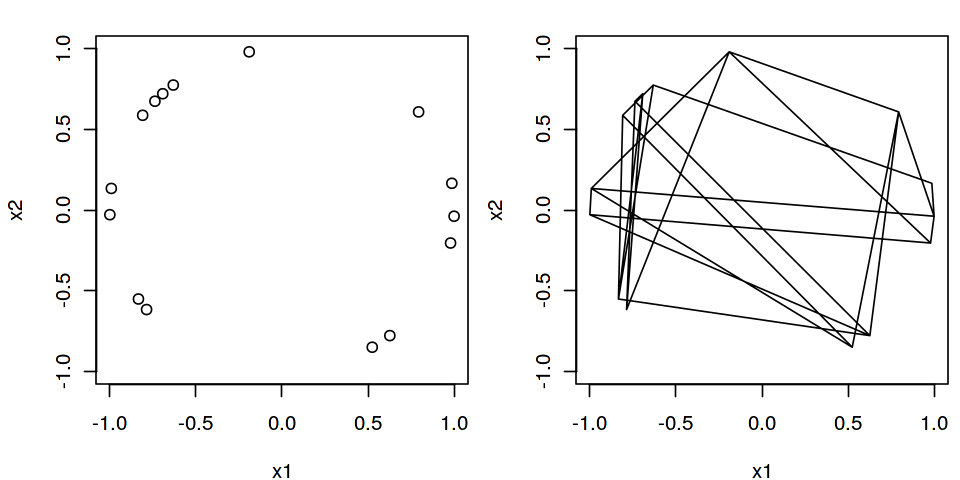

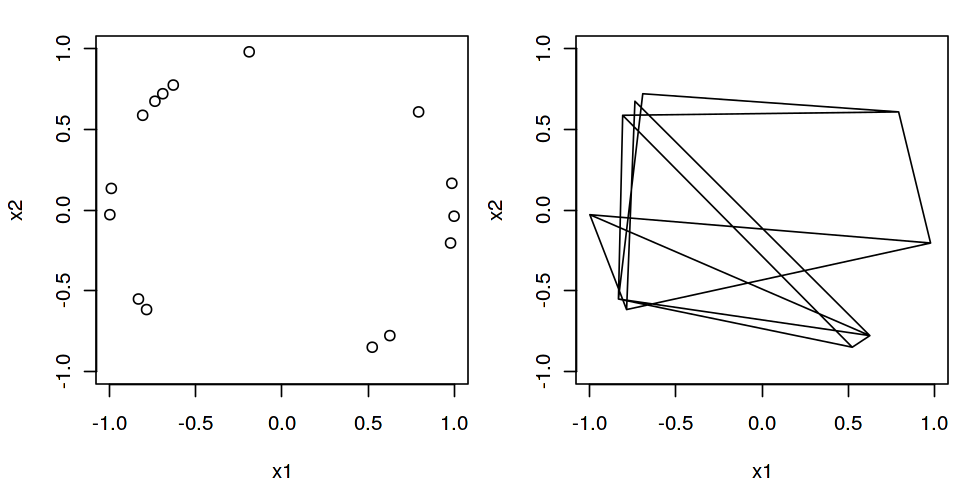

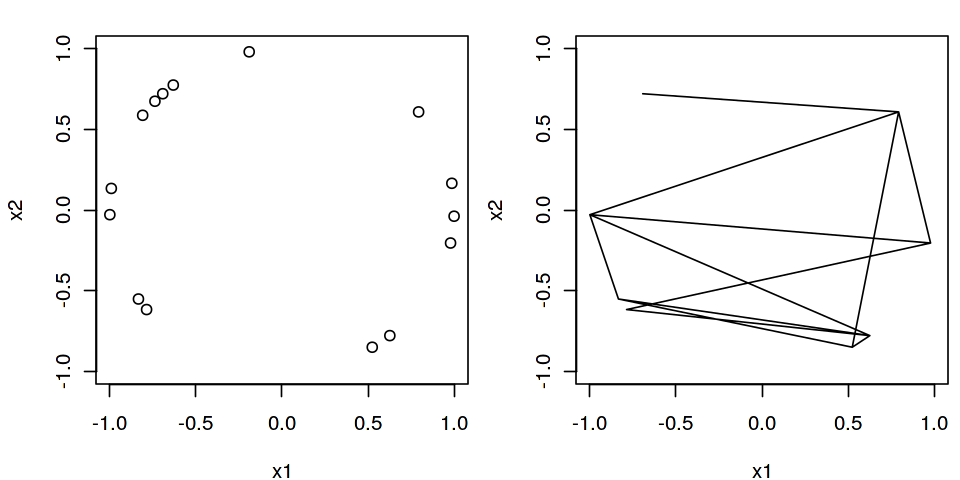

In [10]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Synthetic Data: Points located on two circles

In [44]:
Circle1 <- circleUnif(60)
Circle2 <- circleUnif(60, r = 2) + 3
Circles <- rbind(Circle1, Circle2)

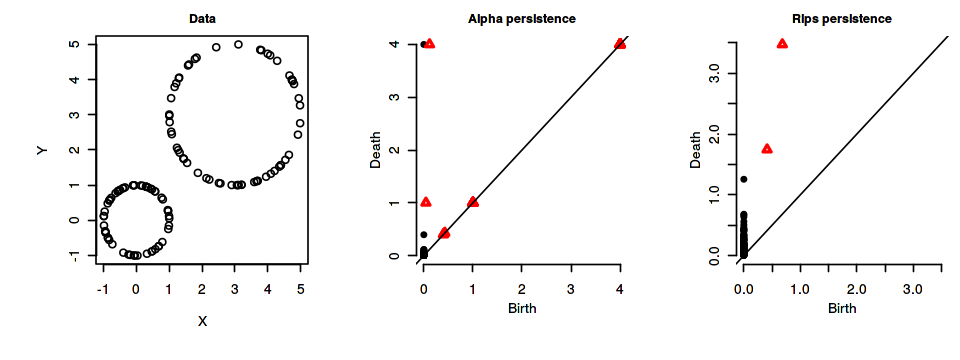

In [45]:
DiagAlphaCmplx = alphaComplexDiag(Circles, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(Circles, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

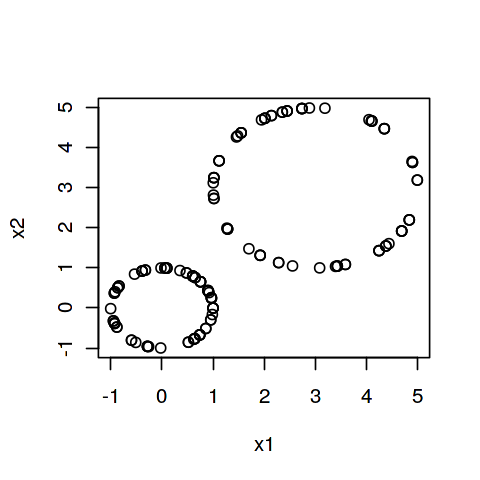

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [14]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 153

In [15]:
str(DiagAlphaCmplx$cycleLocation)

List of 153
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] 1 0.51795 -0.00268 -0.85541
 $ : num [1:2, 1, 1:2] 0.05893 1 0.99826 -0.00268
 $ : num [1:2, 1, 1:2] -0.5931 0.0589 -0.8052 0.9983
 $ : num [1:2, 1, 1:2] -0.51 -0.593 -0.86 -0.805
 $ : num [1:2, 1, 1:2] 0.74 0.518 -0.672 -0.855
 $ : num [1:2, 1, 1:2] 0.74 0.74 -0.673 -0.672
 $ : num [1:2, 1, 1:2] 0.643 0.74 -0.766 -0.673
 $ : num [1:2, 1, 1:2] -0.862 -0.593 0.507 -0.805
 $ : num [1:2, 1, 1:2] -0.879 -0.862 -0.477 0.507
 $ : num [1:2, 1, 1:2] 0.60333 1 0.79749 -0.00268
 $ : num [1:2, 1, 1:2] -0.3218 0.0589 0.9468 0.9983
 $ : num [1:2, 1, 1:2] -0.386 -0.322 0.923 0.947
 $ : num [1:2, 1, 1:2] -0.836 -0.862 0.548 0.507
 $ : num [1:2, 1, 1:2] 0.0965 0.0589 0.9953 0.9983
 $ : num [1:2, 1, 1:2] -0.947 -0.879 -0.322 -0.477
 $ : num [1:2, 1, 1:2] 0.97 0.603 0.244 0.797
 $ : num [1:2, 1, 1:2] 0.95466 1 -0.29769 -0.00268
 $ : num [1:2, 1, 1:2] -0.533 -0.386 0.846 0.923
 $ : num [1:2, 1, 1:2] -0.922 -0.947 -0.387 -0.322
 $ : num [1:2, 1, 1:

In [16]:
DiagAlphaCmplx

$diagram
       dimension      Birth        Death
  [1,]         0 0.00000000          Inf
  [2,]         0 0.00000000 1.021663e-02
  [3,]         0 0.00000000 1.739744e-02
  [4,]         0 0.00000000 4.507573e-02
  [5,]         0 0.00000000 2.492210e-03
  [6,]         0 0.00000000 1.659535e-03
  [7,]         0 0.00000000 5.178955e-07
  [8,]         0 0.00000000 1.421529e-03
  [9,]         0 0.00000000 3.959042e-02
 [10,]         0 0.00000000 3.894314e-02
 [11,]         0 0.00000000 1.171644e-02
 [12,]         0 0.00000000 1.224955e-02
 [13,]         0 0.00000000 6.593145e-04
 [14,]         0 0.00000000 5.874126e-04
 [15,]         0 0.00000000 3.169669e-04
 [16,]         0 0.00000000 1.905155e-03
 [17,]         0 0.00000000 4.929427e-03
 [18,]         0 0.00000000 4.739799e-03
 [19,]         0 0.00000000 1.753173e-03
 [20,]         0 0.00000000 4.808756e-04
 [21,]         0 0.00000000 1.124584e-06
 [22,]         0 0.00000000 2.407038e-02
 [23,]         0 0.00000000 3.069765e-03
 [24,] 

#### Plot loop closing events

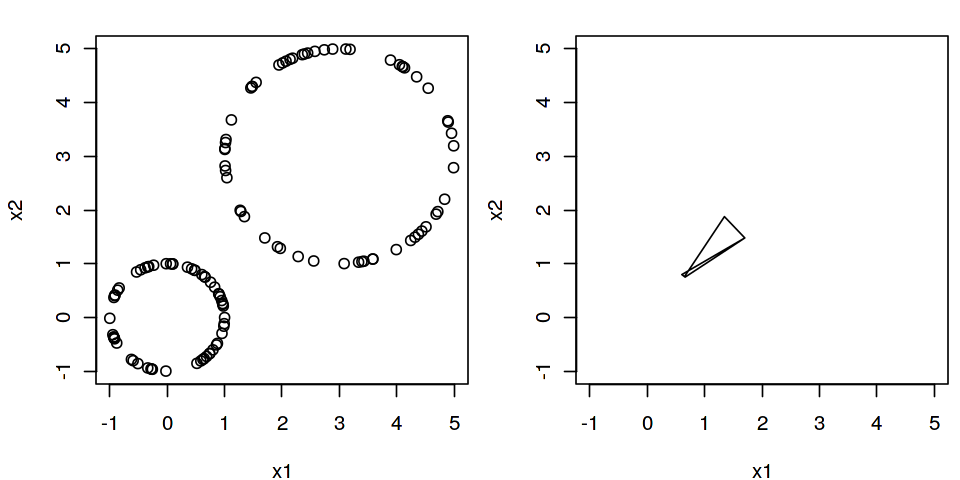

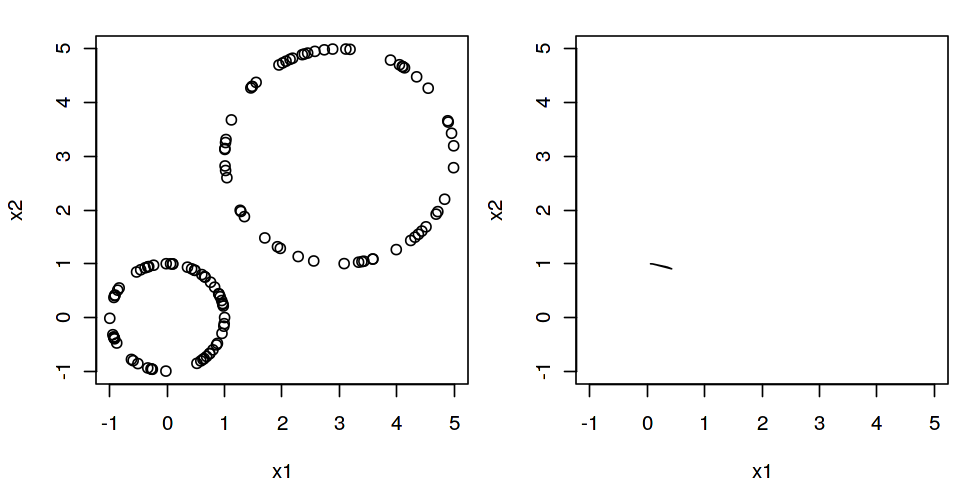

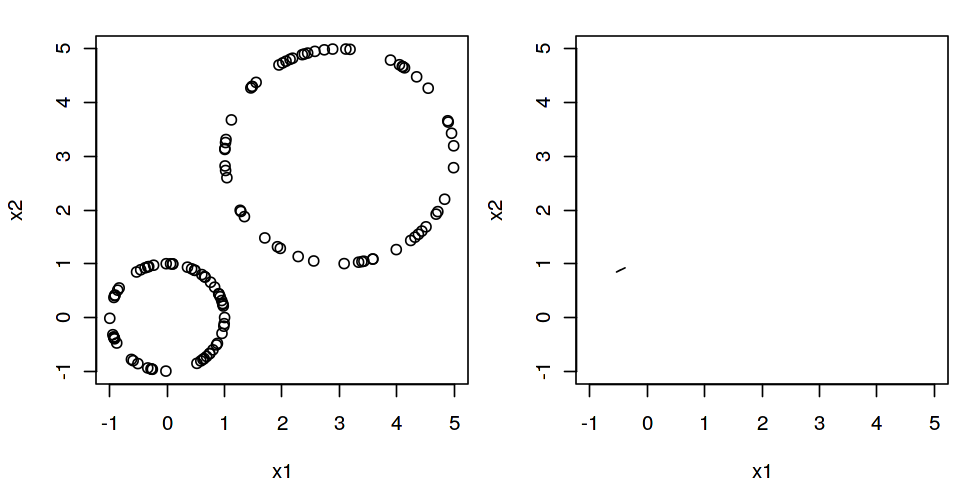

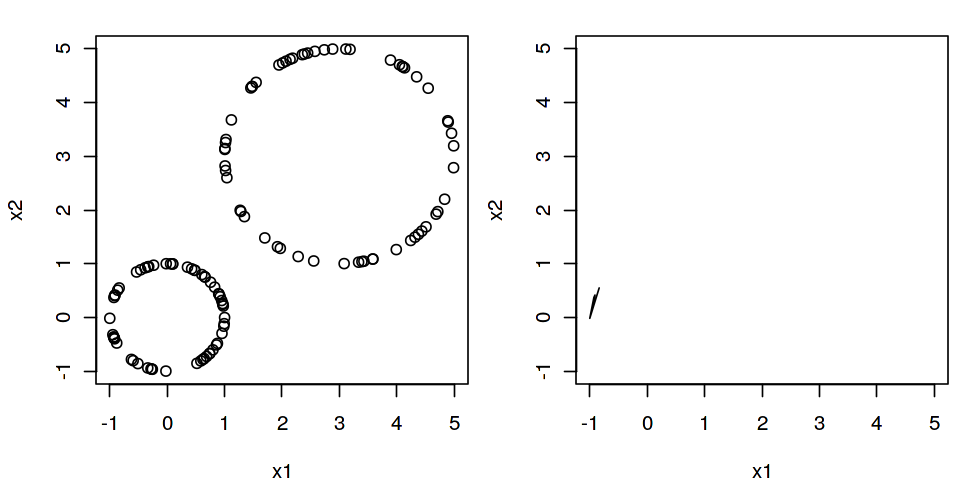

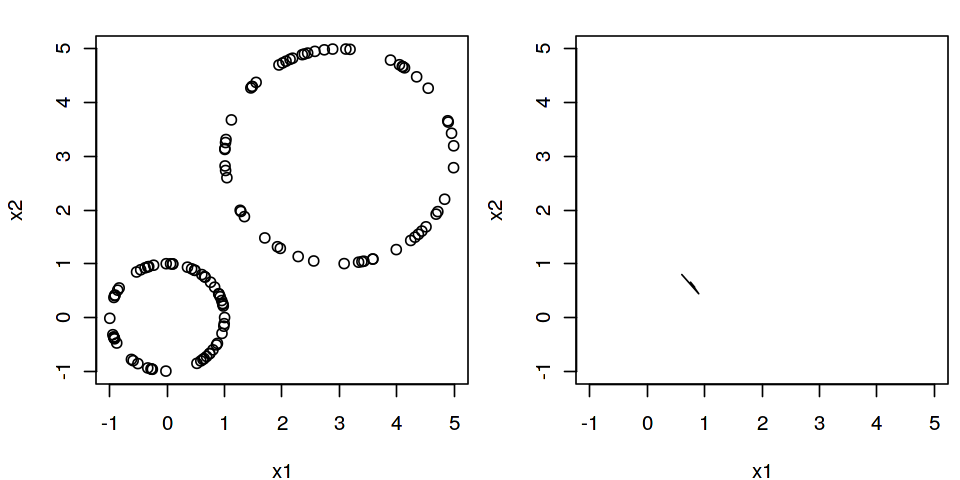

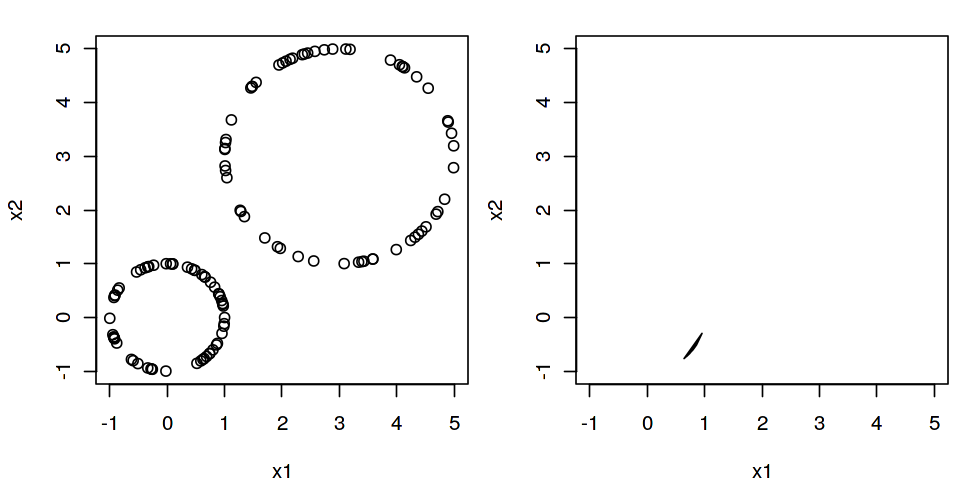

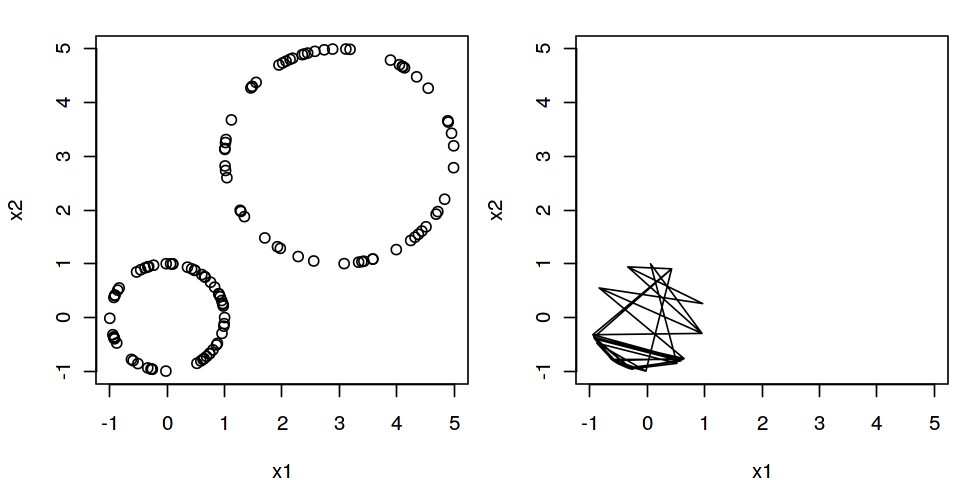

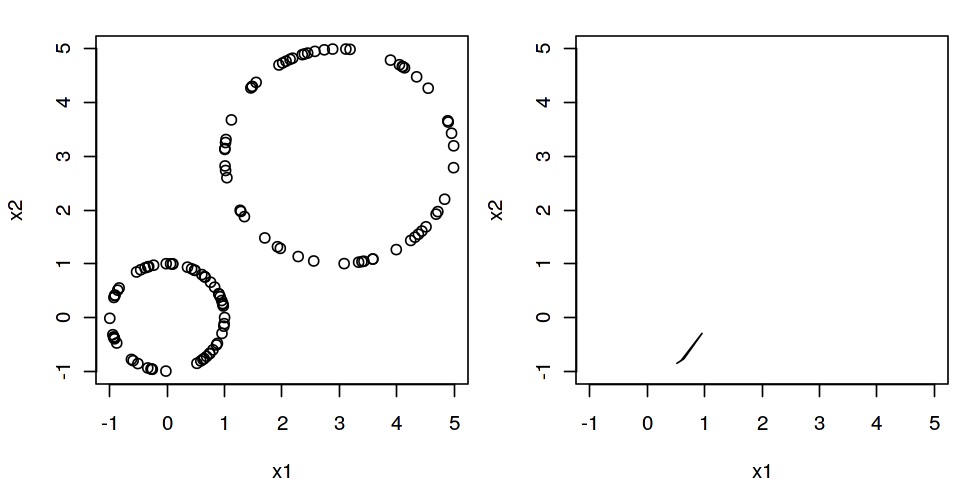

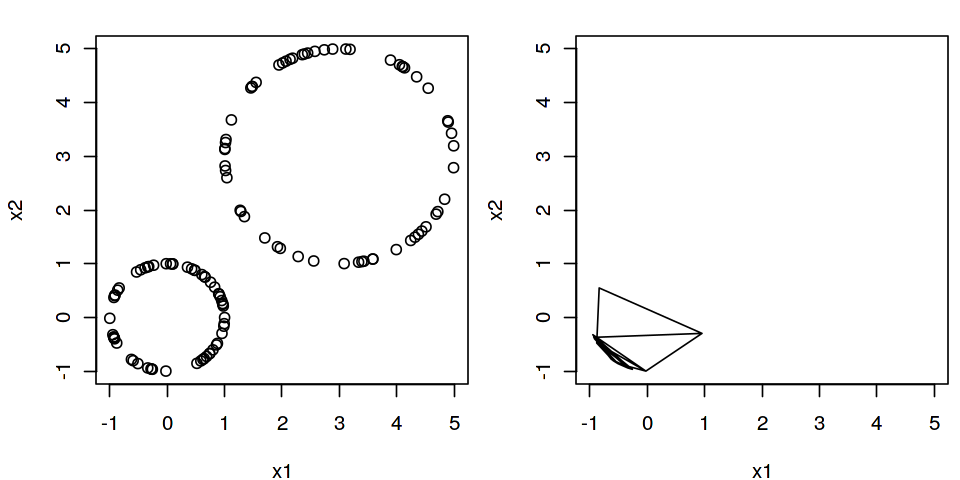

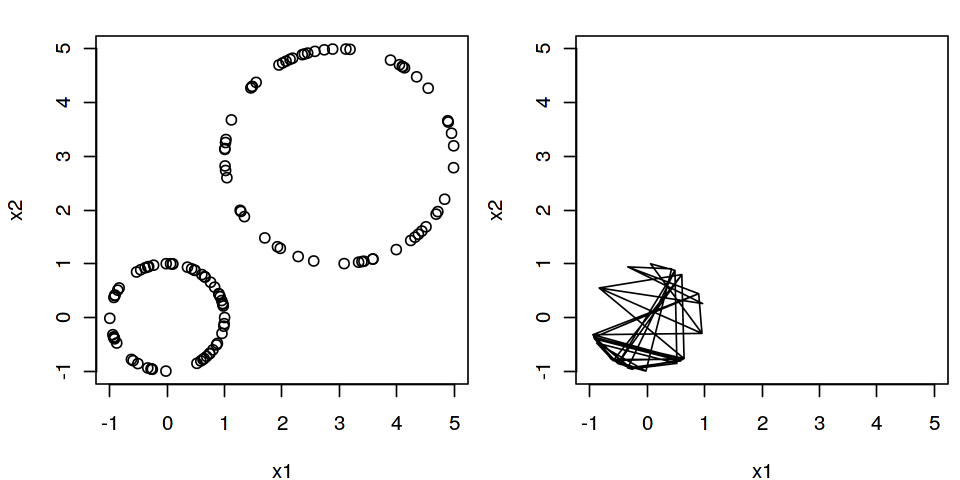

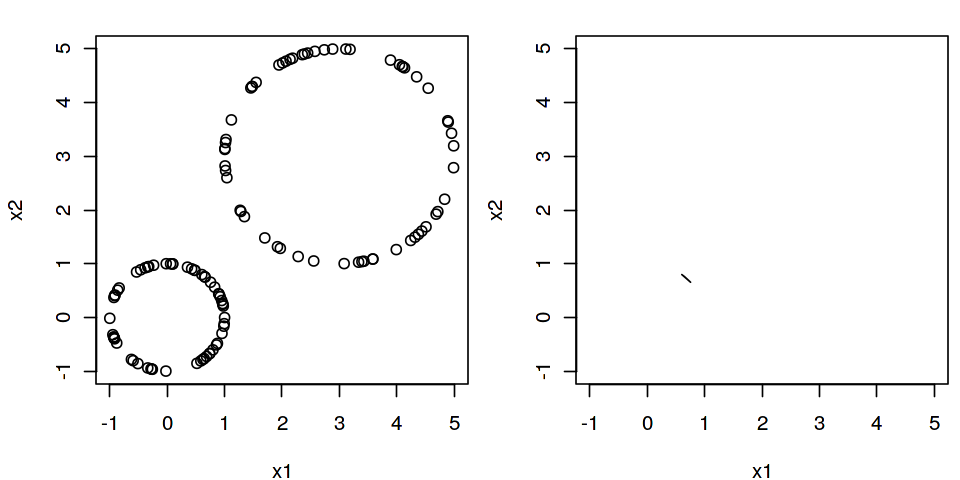

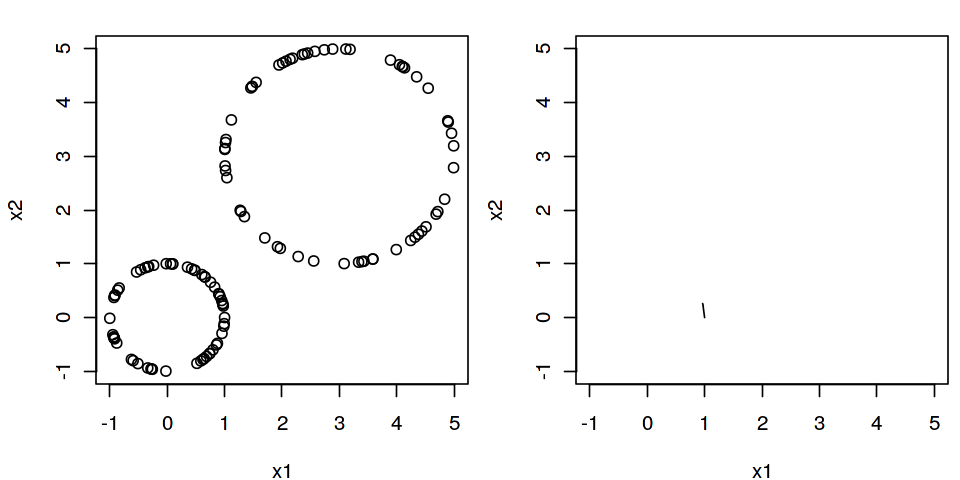

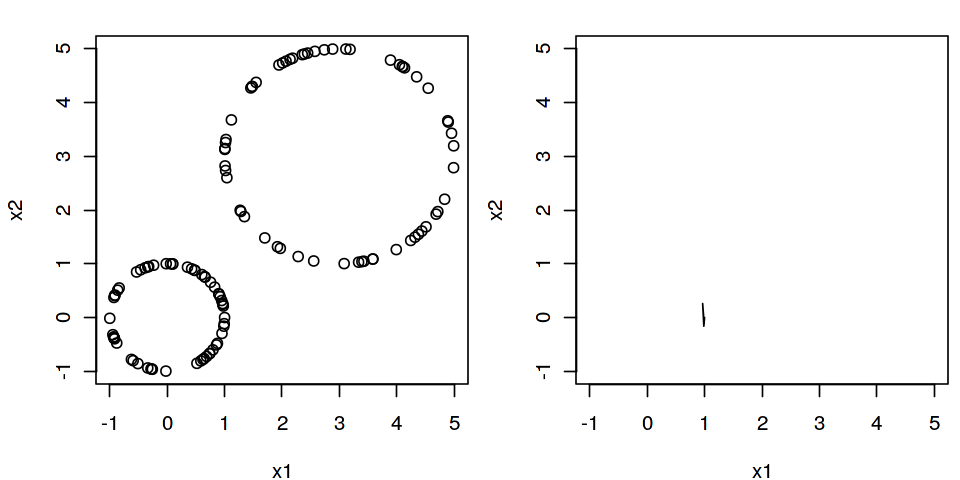

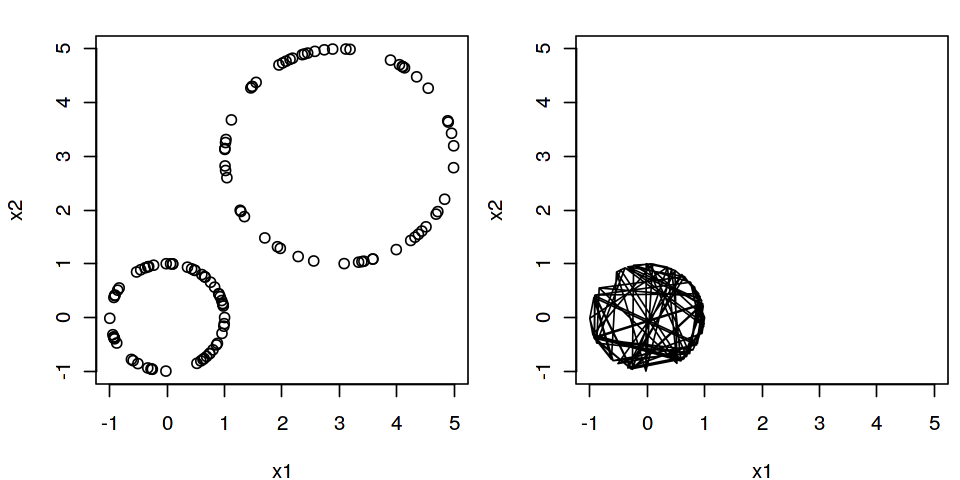

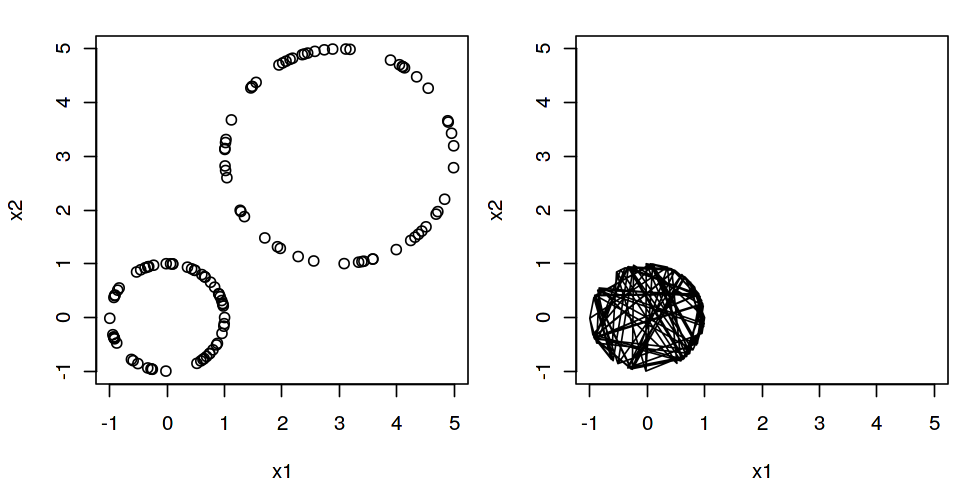

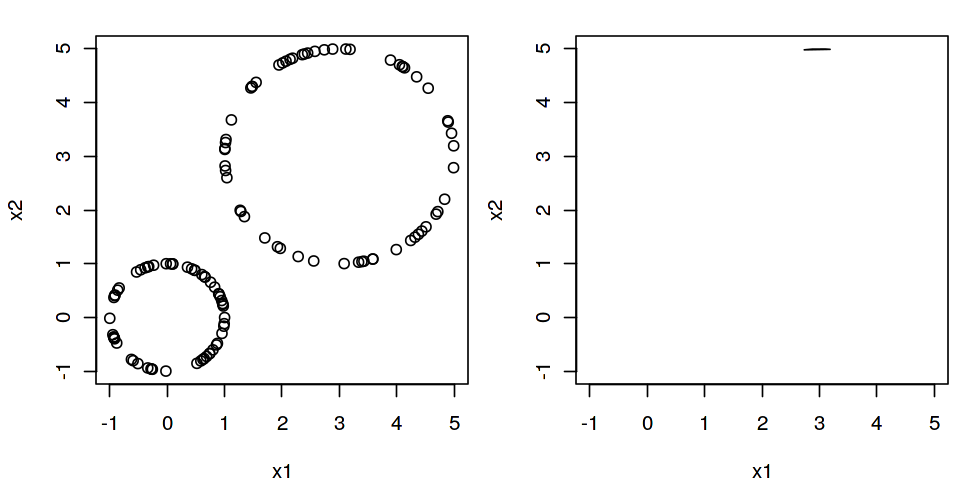

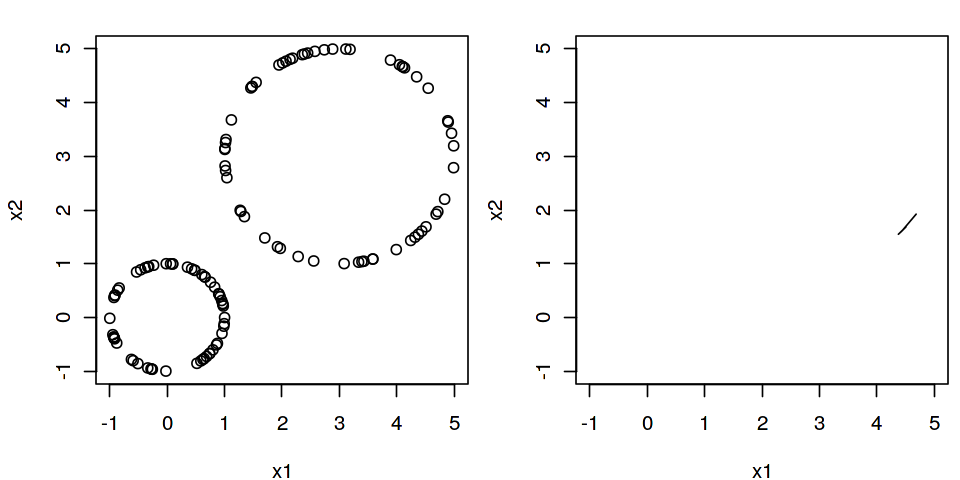

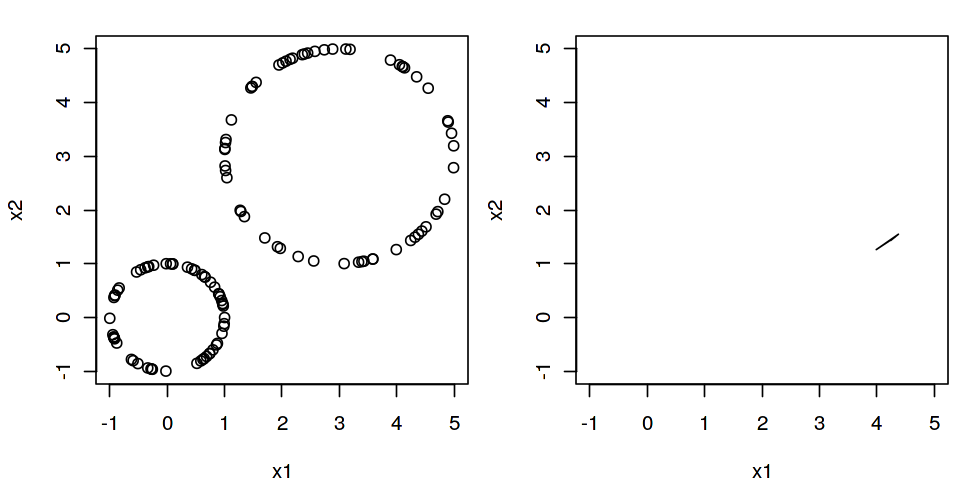

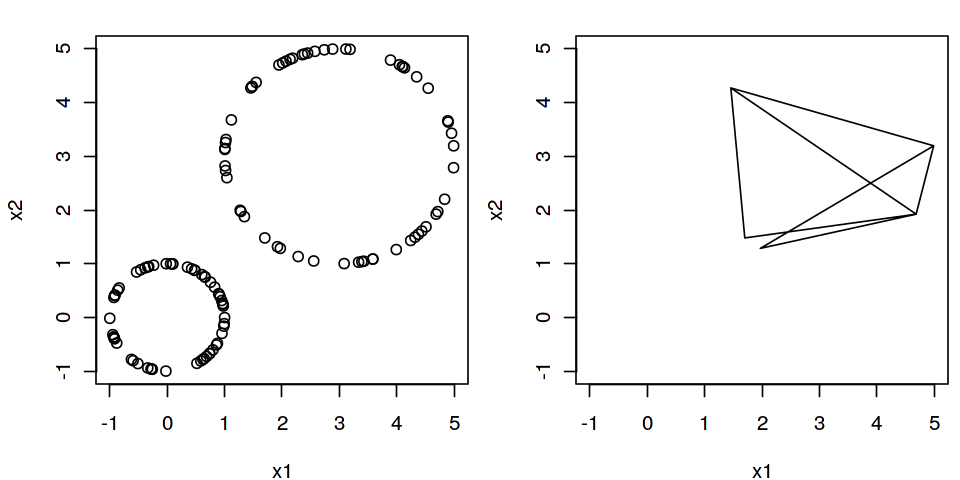

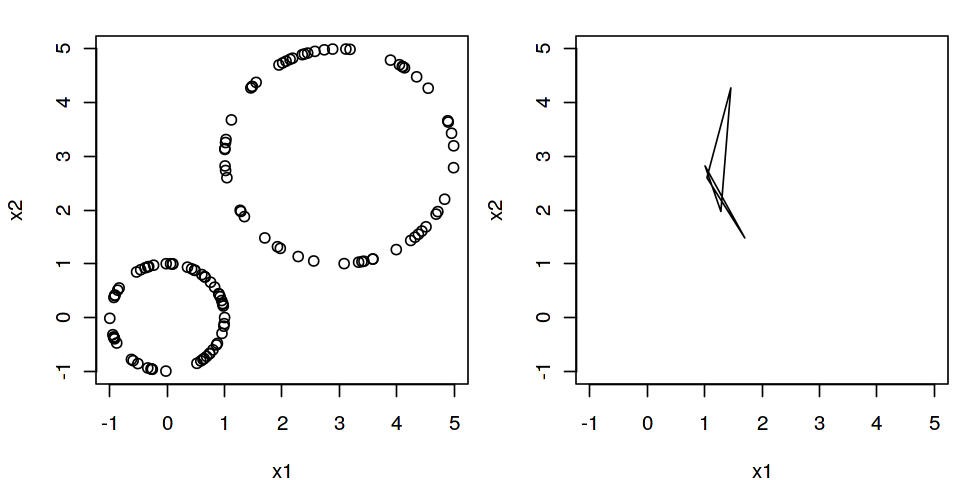

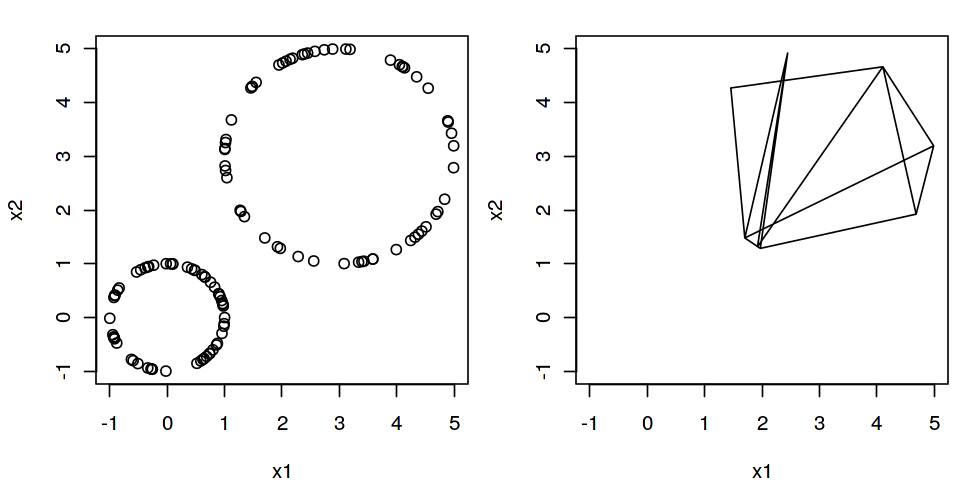

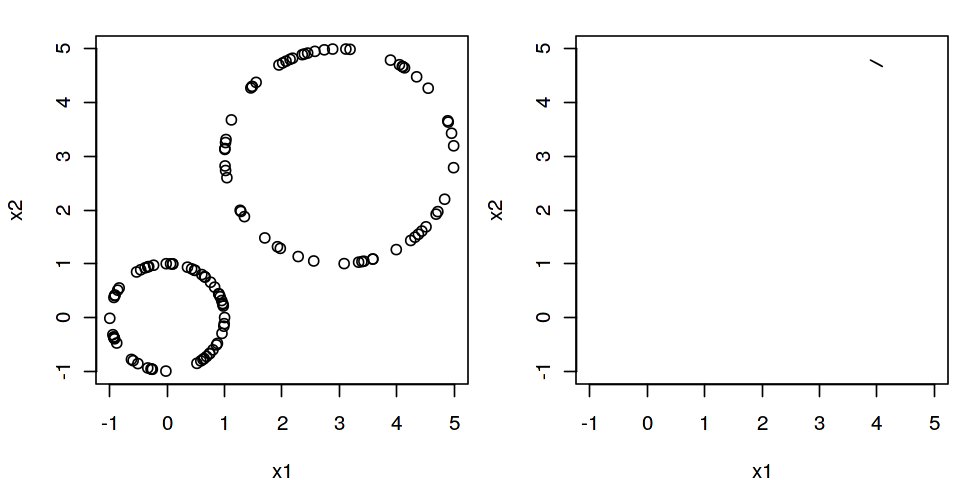

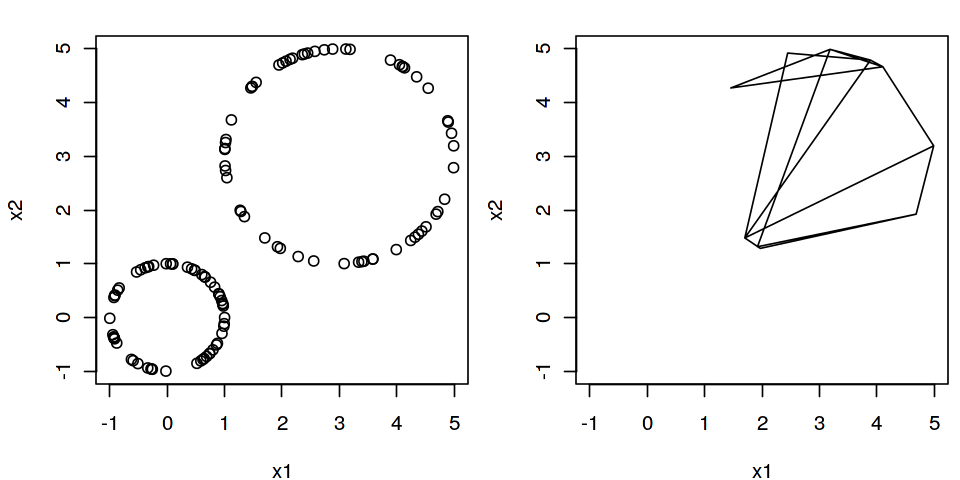

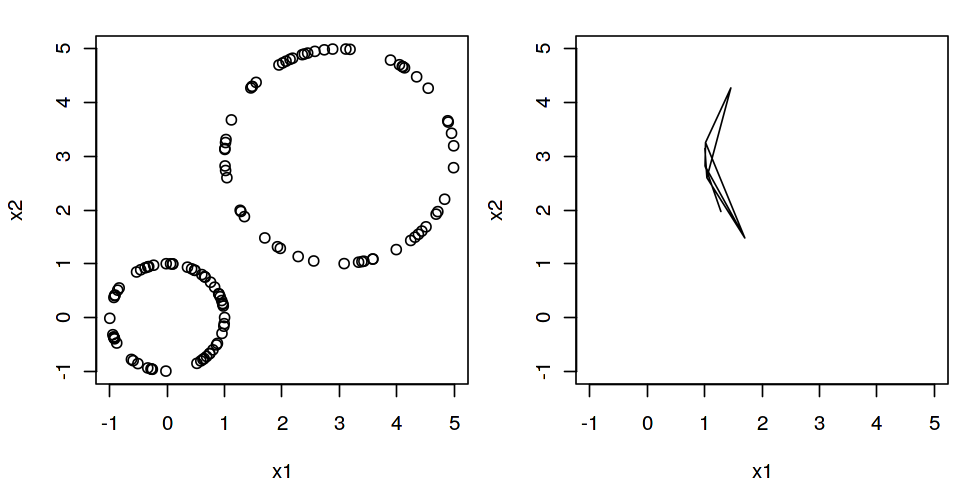

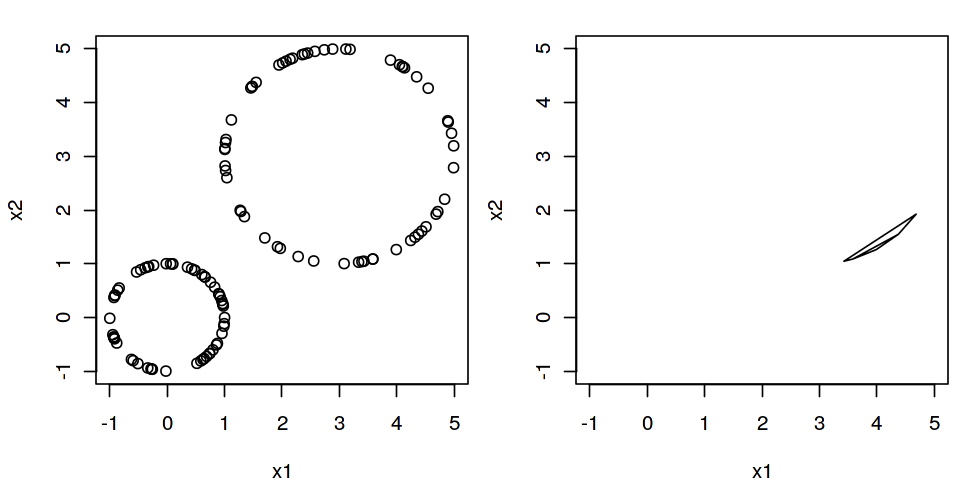

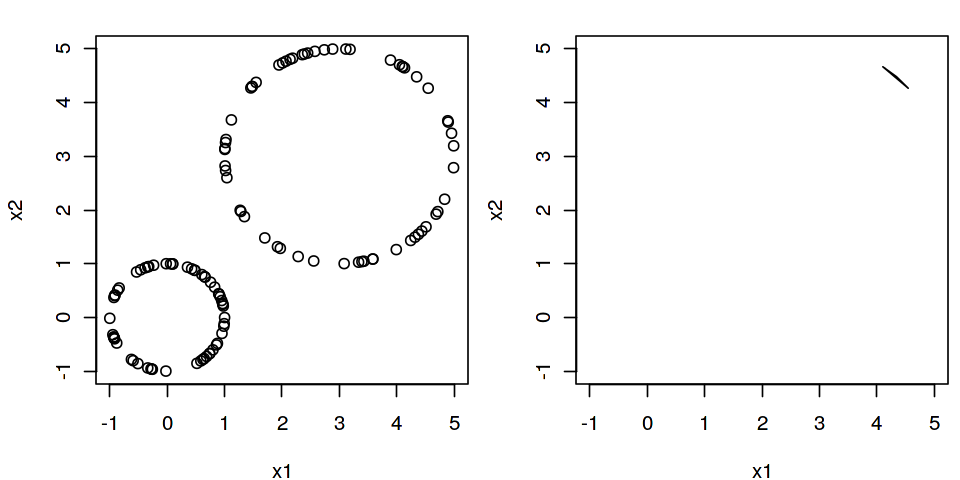

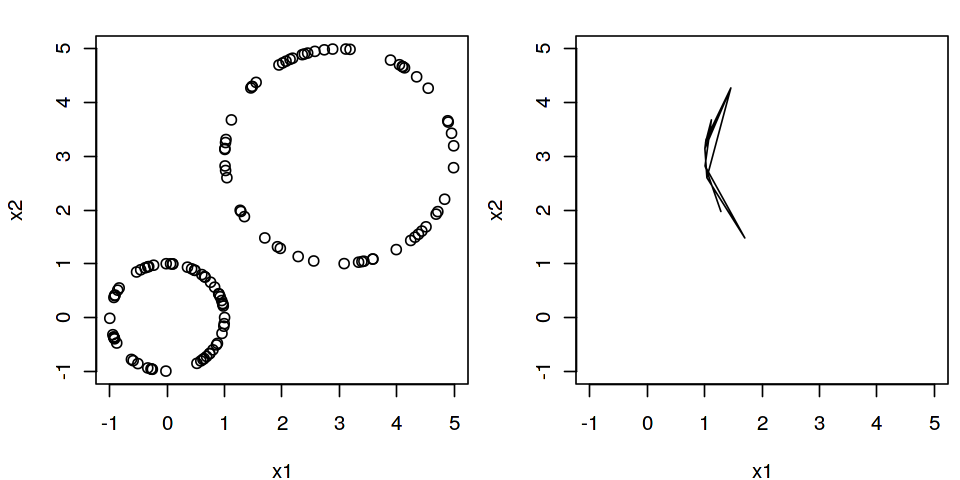

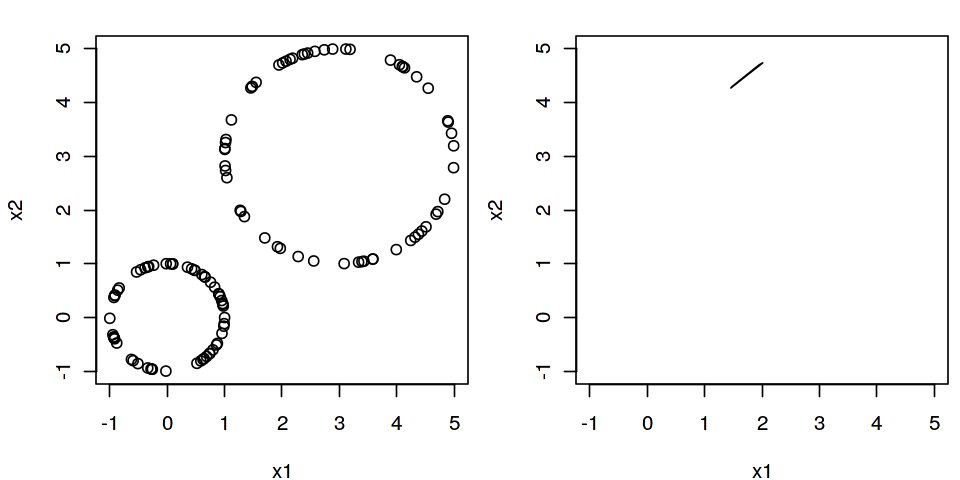

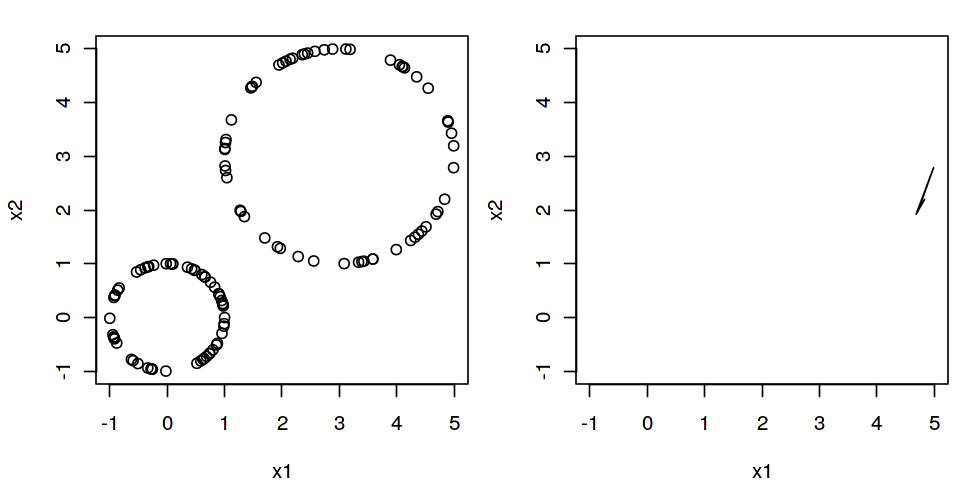

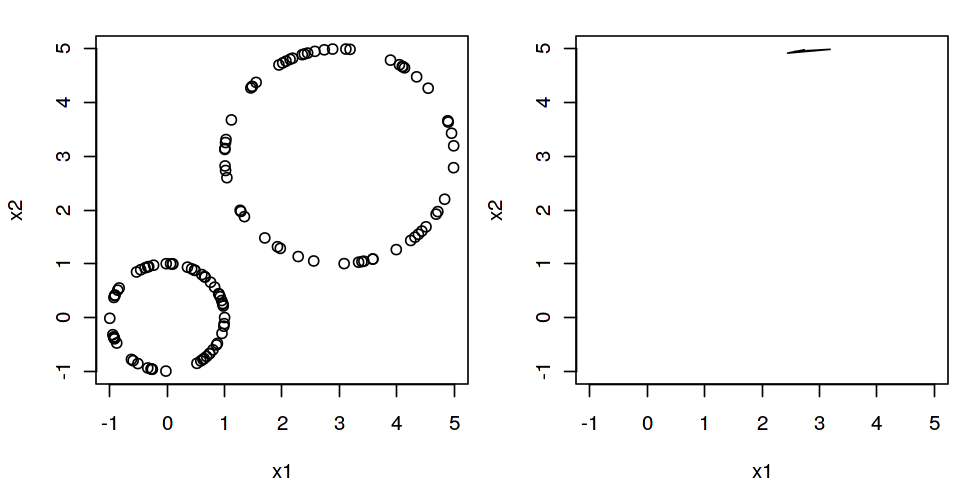

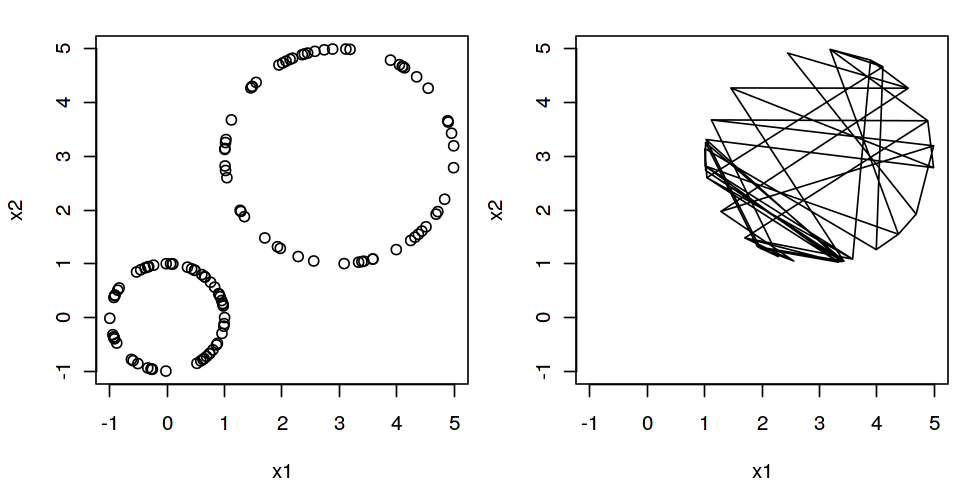

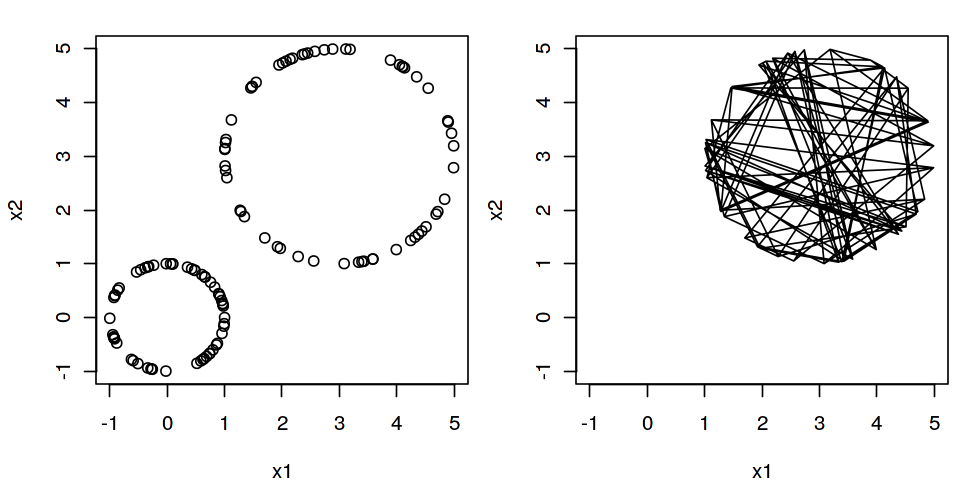

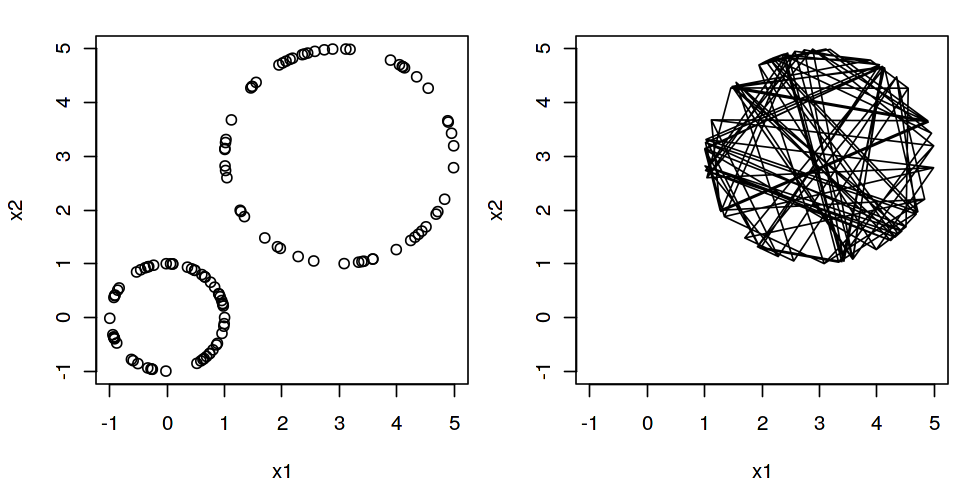

In [17]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(Circles, xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
    }
    
}

x.hull,y.hull
4.83321343,2.20041980
4.71428574,1.96984254
4.68496924,1.92255920
4.50855777,1.68689169
4.43548536,1.60738311
4.37599545,1.54857432
4.31623424,1.49416886
4.24208306,1.43244468
3.99079384,1.26266654
0.51795032,-0.85541070


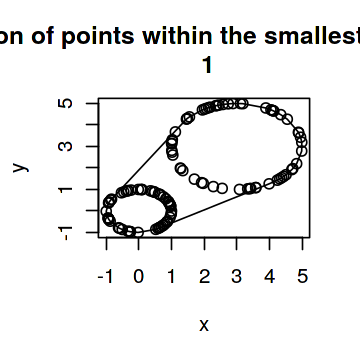

In [26]:
library(aplpack)
#options(repr.plot.width=3, repr.plot.height=3)
#plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plothulls(Circles)

In [29]:
fun_check = function(a,b){
    c = a+b
    return(c)
}

In [43]:
#duration_filter = function(rips_homology,alpha)
rips_duration = rips_homology[,3]-rips_homology[,2]
rips_homology2 = cbind(rips_homology,rips_duration)
print(rips_homology)

       dimension    Birth       Death rips_duration rips_duration
  [1,]         0 0.000000 0.000160334   0.000160334   0.000160334
  [2,]         0 0.000000 0.001439310   0.001439310   0.001439310
  [3,]         0 0.000000 0.002120930   0.002120930   0.002120930
  [4,]         0 0.000000 0.006133970   0.006133970   0.006133970
  [5,]         0 0.000000 0.006407660   0.006407660   0.006407660
  [6,]         0 0.000000 0.008270820   0.008270820   0.008270820
  [7,]         0 0.000000 0.010488100   0.010488100   0.010488100
  [8,]         0 0.000000 0.011994400   0.011994400   0.011994400
  [9,]         0 0.000000 0.012205900   0.012205900   0.012205900
 [10,]         0 0.000000 0.012375900   0.012375900   0.012375900
 [11,]         0 0.000000 0.012898400   0.012898400   0.012898400
 [12,]         0 0.000000 0.013484600   0.013484600   0.013484600
 [13,]         0 0.000000 0.014698400   0.014698400   0.014698400
 [14,]         0 0.000000 0.014930600   0.014930600   0.014930600
 [15,]    

In [39]:
print(rips_homology[,1])

  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 1 1
